<h2>Exercise 3 - Fitting an OLS model to data</h2>

In this exercise, we are comparing the accuracy of a linear and a second degree polynomial model to data. We then split intto two sets, training and testsets to check if generalization is possible. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

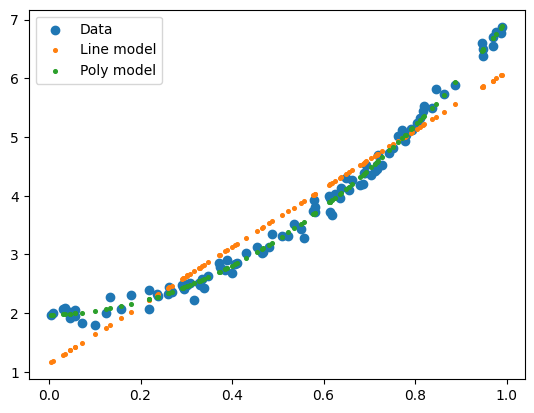

(0.1400824204354447, 0.01129113339625295)

In [2]:
n = 100
x = np.random.rand(n, 1)
y = 2.0 + 5 * x**2 + 0.1 * np.random.randn(n, 1)

line_model = LinearRegression().fit(x, y)
line_predict = line_model.predict(x)
line_mse = mean_squared_error(y, line_predict)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(x)
poly_model = LinearRegression().fit(X_poly, y)
poly_predict = poly_model.predict(X_poly)
poly_mse = mean_squared_error(y, poly_predict)

plt.scatter(x, y, label = "Data")
plt.scatter(x, line_predict, label = "Line model", s=7)
plt.scatter(x, poly_predict, label = "Poly model", s=7)
plt.legend()
plt.show()
line_mse, poly_mse

We can see that the mean square error is much larger for the linear model than for the second degree polynomial.

<h2>Exercise 4 - The train-test split</h2>

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# This splits the set into a 80-20 split, where 80% is used for training and 20 for test. 
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fitting model to X_tain
model = LinearRegression().fit(X_train, y_train)

# Computing the MSE on the training and on the testing data
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test  = mean_squared_error(y_test,  model.predict(X_test))

X_test.shape, mse_train, mse_test

((20, 2), 0.01041204970897822, 0.015615333849724375)

We do not train on testing data (X_test) because it is meant to simulate future data. The model is trained only on the training set, which determines the parameters. The separation of sets gives an unbiased estimate.